# Agrupación de todo el Periodo

In [1]:
library(loadeR)
library(transformeR)
library(visualizeR)

Warning message:
"package 'loadeR' was built under R version 3.6.3"Loading required package: rJava
Warning message:
"package 'rJava' was built under R version 3.6.3"

Loading required package: loadeR.java
Warning message:
"package 'loadeR.java' was built under R version 3.6.3"Java version 21x amd64 by Azul Systems, Inc. detected
NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready
Loading required package: climate4R.UDG
Warning message:
"package 'climate4R.UDG' was built under R version 3.6.3"climate4R.UDG version 0.2.6 (2023-06-26) is loaded
Please use 'citation("climate4R.UDG")' to cite this package.
loadeR version 1.8.1 (2023-06-22) is loaded
Please use 'citation("loadeR")' to cite this package.
Warning message:
"package 'transformeR' was built under R version 3.6.3"


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded
Please see 'citation("transformeR")' to cite this package.
Warning message:
"package 'visualizeR' was built under R version 3.6.3"visualizeR version 1.6.4 (2023-10-26) is loaded
Please see 'citation("visualizeR")' to cite this package.


# Import Data

In [2]:
sum10 <- readRDS("../4_sum_CE/sum_CE10_h.rds")

In [3]:
capa_tierra <- readRDS("../capa_tierra.rds")

### Prueba un año concreto

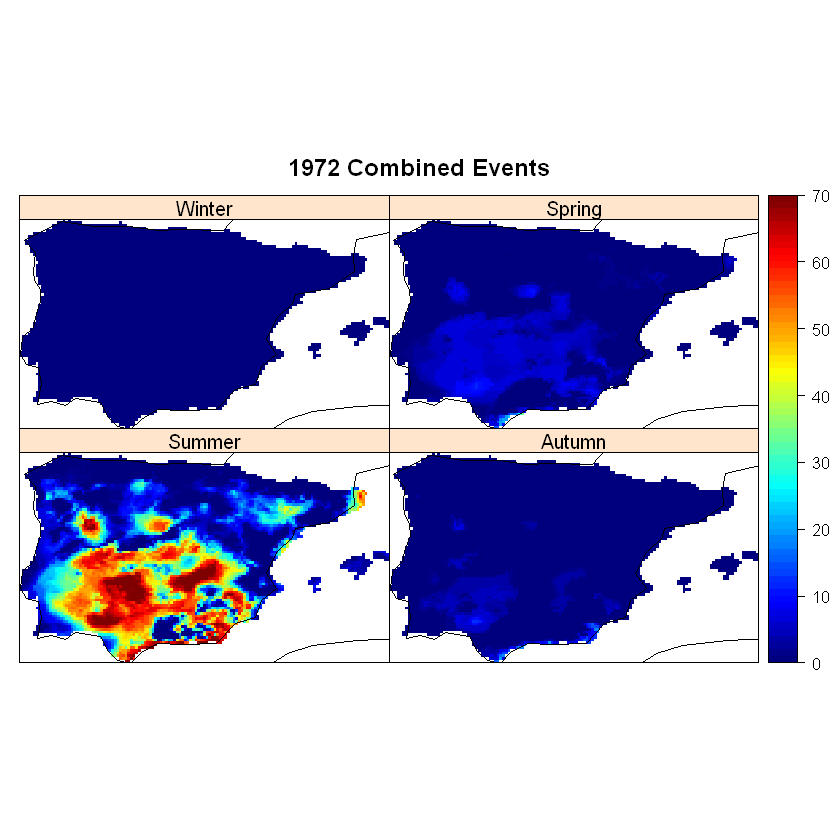

In [5]:
y1972_num <- bindGrid(sum_CE_num$`1972`$Winter, sum_CE_num$`1972`$Spring, sum_CE_num$`1972`$Summer, sum_CE_num$`1972`$Autumn, dimension= "member", skip.temporal.check = TRUE)

spatialPlot(y1972_num, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), main = "1972 Combined Events", set.min = 0, set.max = 70, at = seq(0,70), as.table = TRUE)

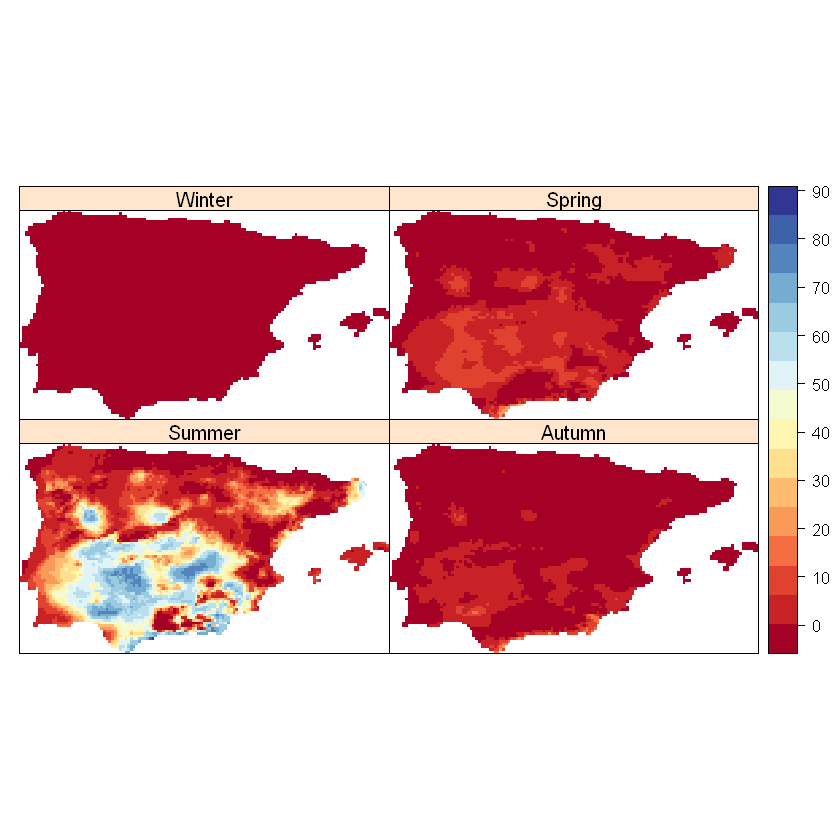

In [6]:
y72 <- bindGrid(sum_CE_num$`1972`$Winter, sum_CE_num$`1972`$Spring, sum_CE_num$`1972`$Summer, sum_CE_num$`1972`$Autumn, dimension = "member", skip.temporal.check = TRUE)
spatialPlot(y72, names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table =TRUE)

# Function

In [4]:
# Función para realizar bindGrid de una estación específica para varios años
bindGridEstaciones <- function(datos, estacion) {
  # Extraemos los años disponibles en los datos
  years <- names(datos)
  
  # Creamos una lista para almacenar los grids de cada año
  lista_grids <- list()
  
  # Iteramos sobre los años
  for (year in years) {
    # Obtenemos el grid para la estación especificada
    grid <- datos[[year]][[estacion]]
    # Lo añadimos a la lista
    lista_grids[[year]] <- grid
  }
  
  # Realizamos el bindGrid con todos los grids de la lista
  resultado <- bindGrid(lista_grids, dimension = "time", skip.temporal.check = TRUE)
  return(resultado)
}

In [5]:
# Crear un vector con los nombres de las estaciones
estaciones <- c("Winter", "Spring", "Summer", "Autumn")

# Crear una lista para almacenar los resultados
dataPeriod <- list()

# Iterar sobre las estaciones
for (estacion in estaciones) {
  # Obtener los datos para la estación actual
  datos_estacion <- bindGridEstaciones(sum10, estacion = estacion)
  datos_estacion <- climatology(datos_estacion, clim.fun = list(FUN = "sum", na.rm = TRUE))
  datos_estacion <- gridArithmetics(datos_estacion, capa_tierra, operator = "*")
  
  # Almacenar los resultados en la lista
  dataPeriod[[estacion]] <- datos_estacion
}


[2024-03-14 12:08:27] - Computing climatology...
[2024-03-14 12:08:27] - Done.
[2024-03-14 12:08:27] - Computing climatology...
[2024-03-14 12:08:27] - Done.
[2024-03-14 12:08:27] - Computing climatology...
[2024-03-14 12:08:27] - Done.
[2024-03-14 12:08:28] - Computing climatology...
[2024-03-14 12:08:28] - Done.


In [8]:
saveRDS(dataPeriod, "CE10_h_allPeriod.rds", compress = "xz")

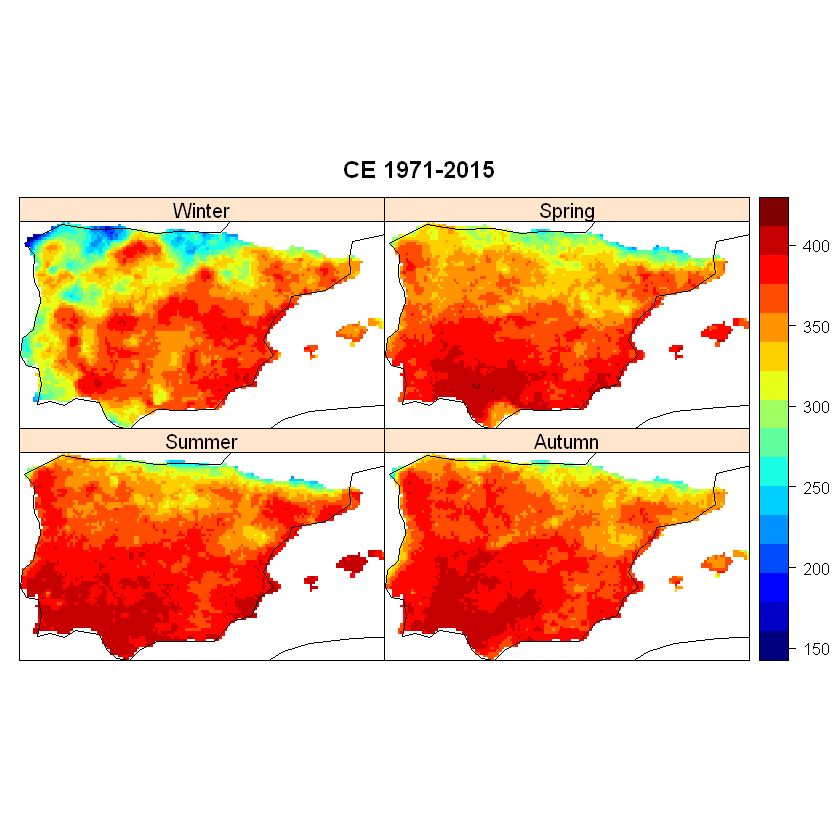

In [12]:
fullPeriod <- bindGrid(dataPeriod$Winter , dataPeriod$Spring, dataPeriod$Summer, dataPeriod$Autumn, dimension = "member", skip.temporal.check = TRUE)
spatialPlot(fullPeriod, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), main = "CE 1971-2015", as.table = TRUE)

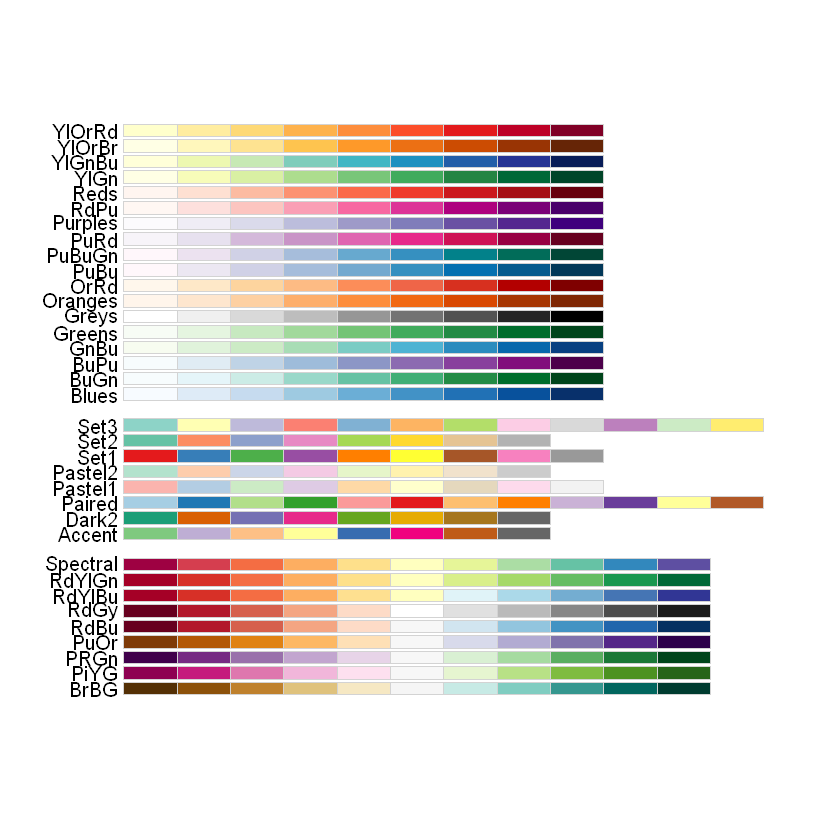

In [26]:
display.brewer.all()

## Maps for season Full Period

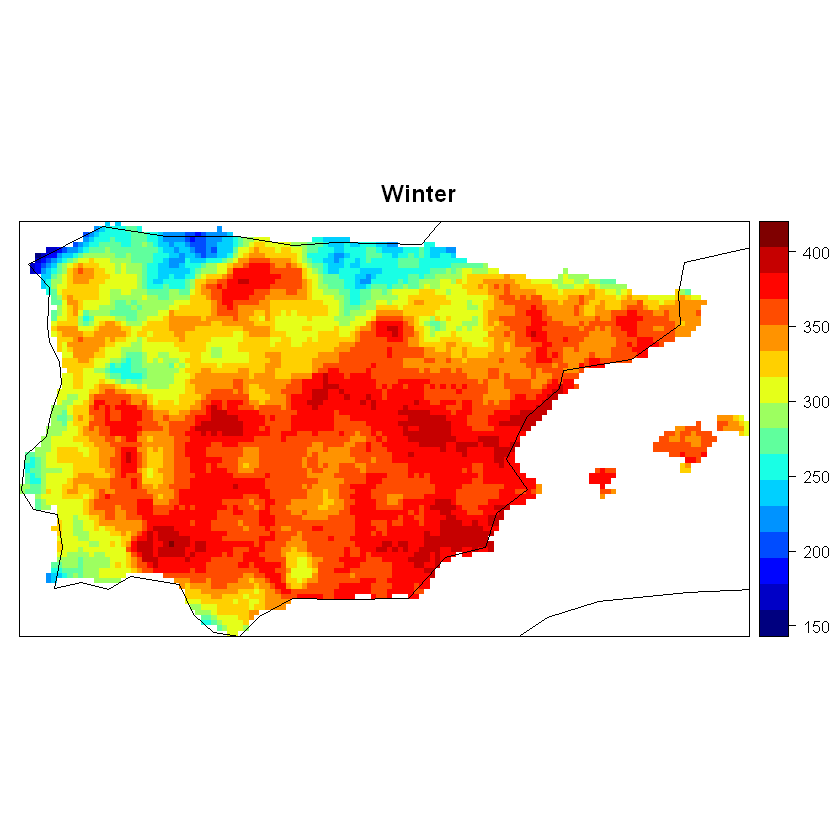

In [14]:
spatialPlot(dataPeriod$Winter, backdrop.theme = "coastline", color.theme = "jet.colors", main = "Winter", as.table = TRUE)

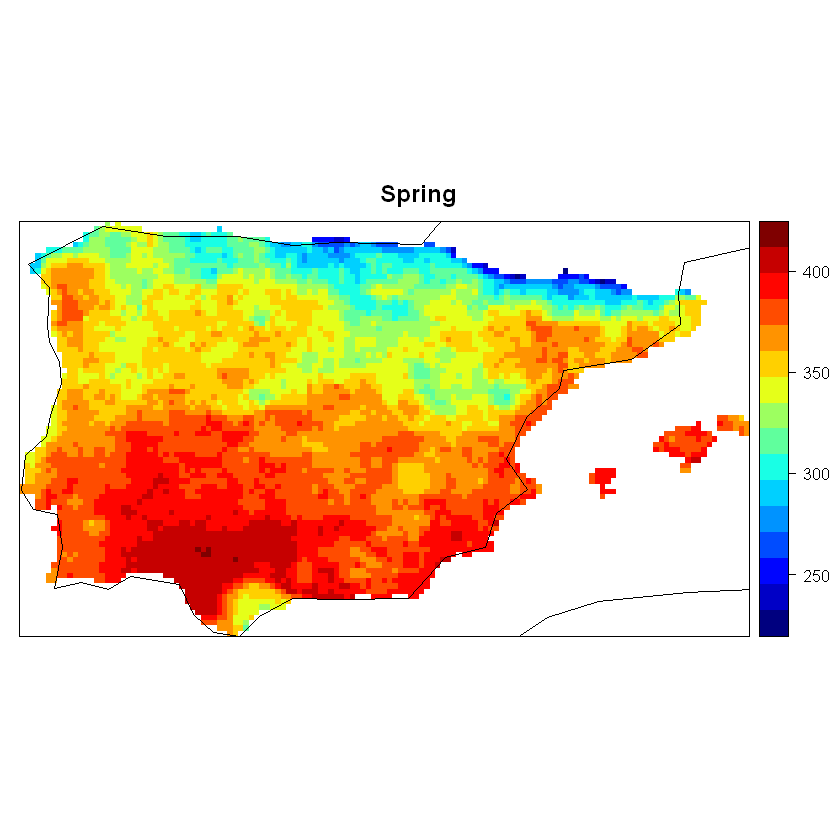

In [15]:
spatialPlot(dataPeriod$Spring, backdrop.theme = "coastline", color.theme = "jet.colors", main = "Spring", as.table = TRUE)

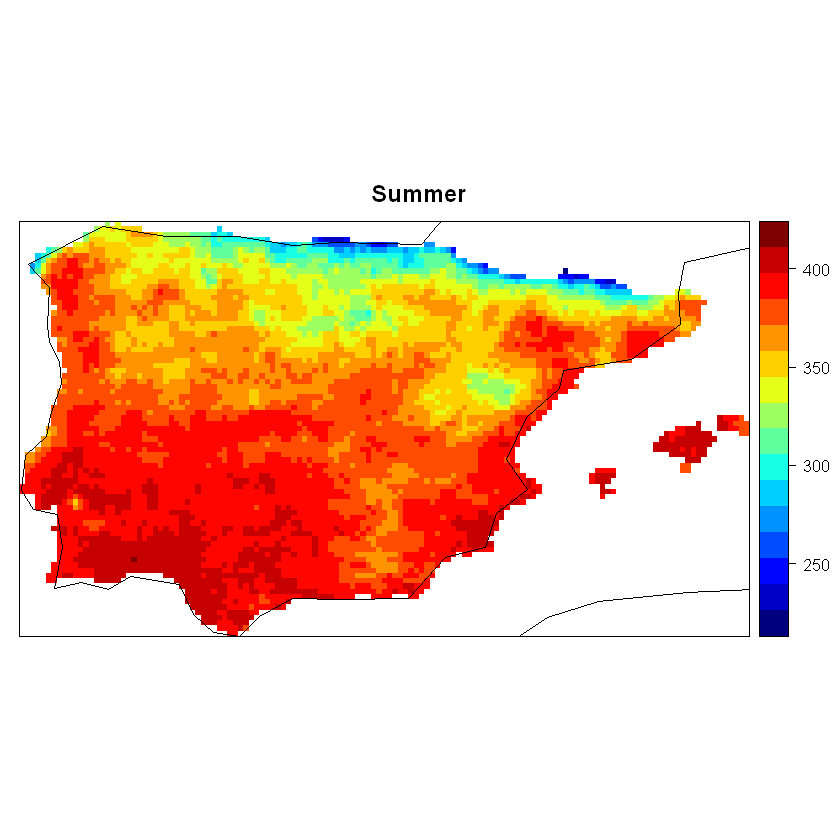

In [16]:
spatialPlot(dataPeriod$Summer, backdrop.theme = "coastline", color.theme = "jet.colors", main = "Summer", as.table = TRUE)

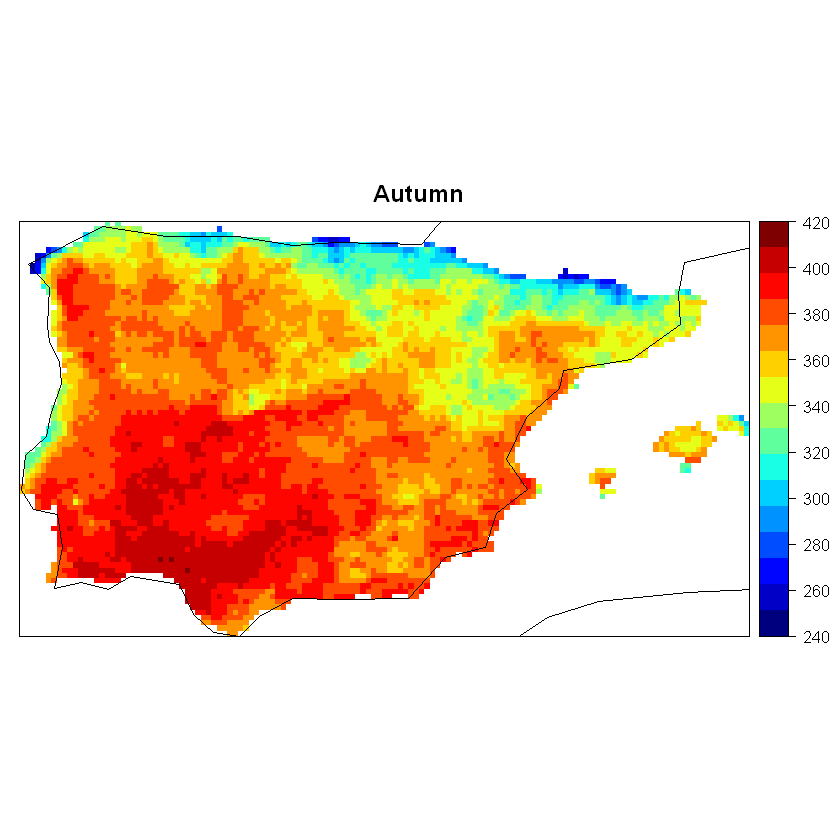

In [17]:
spatialPlot(dataPeriod$Autumn, backdrop.theme = "coastline", color.theme = "jet.colors", main = "Autumn", as.table = TRUE)

# Tendencias (Percentil Ref Num)

## Spring

In [13]:
spring <- bindGridEstaciones(CE_num, estacion = "Spring")

In [14]:
str(spring)

List of 4
 $ Variable:List of 2
  ..$ varName: chr "pr"
  ..$ level  : NULL
  ..- attr(*, "use_dictionary")= logi FALSE
  ..- attr(*, "description")= chr "Precipitation amount"
  ..- attr(*, "units")= chr "kg m-2"
  ..- attr(*, "longname")= chr "pr"
  ..- attr(*, "daily_agg_cellfun")= chr "none"
  ..- attr(*, "monthly_agg_cellfun")= chr "none"
  ..- attr(*, "verification_time")= chr "none"
  ..- attr(*, "subset")= chr "time"
 $ Data    : num [1:4140, 1:79, 1:137] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 $ xyCoords:List of 2
  ..$ x: num [1:137] -9.5 -9.4 -9.3 -9.2 -9.1 -9 -8.9 -8.8 -8.7 -8.6 ...
  ..$ y: num [1:79] 36 36.1 36.2 36.3 36.4 36.5 36.6 36.7 36.8 36.9 ...
  ..- attr(*, "projection")= chr "LatLonProjection"
  ..- attr(*, "resX")= num 0.101
  ..- attr(*, "resY")= num 0.1
 $ Dates   :List of 2
  ..$ start: Named chr [1:4140] "1971-03-01 00:00:00 GMT" "1971-03-02 00:00:00 GMT" "1971-03-03 00:00:00 GMT" "1971-03-04 00:

In [15]:
dates <- getRefDates(spring)

[2024-03-04 11:50:09] - Computing climatology...
Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):

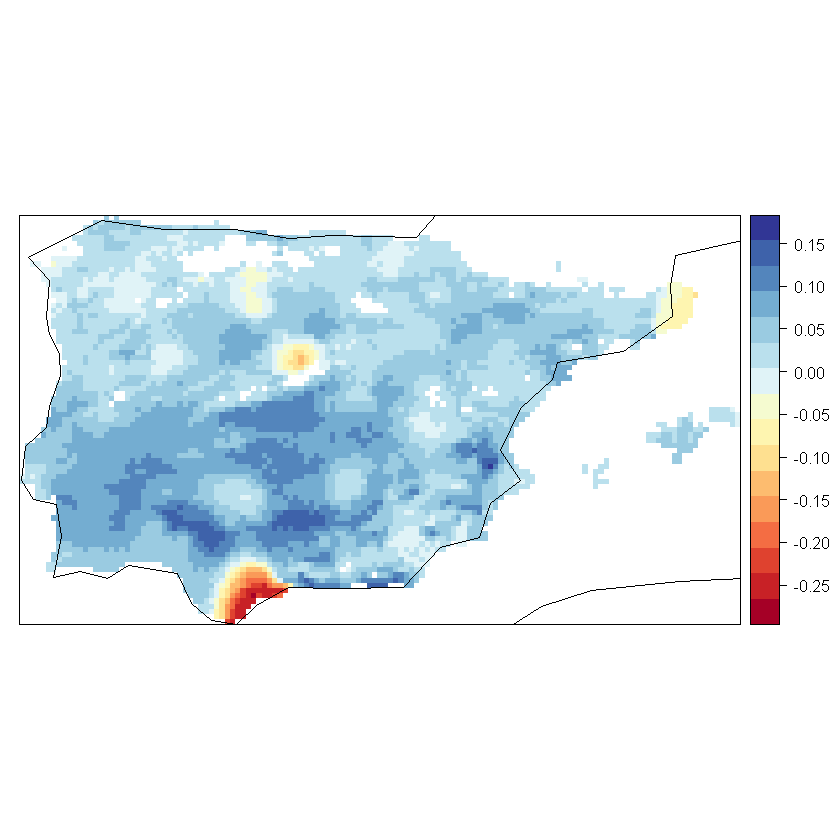

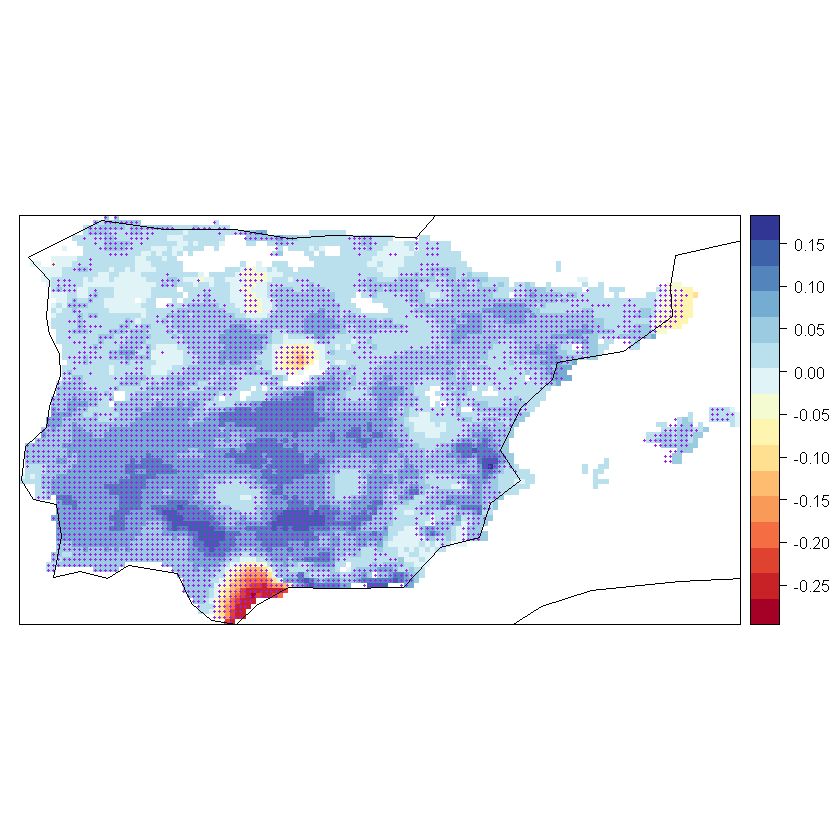

In [17]:
# An example of how to compute a trend map using climatology as a wrapper for trend:
# data("EOBS_Iberia_tas")
# dates <- getRefDates(EOBS_Iberia_tas)

tau.estimate <- climatology(spring,
                            clim.fun = list(FUN = "trend.1D", dates = dates, method = "kendall"))
spatialPlot(tau.estimate, backdrop.theme = "coastline")
# Adding significant trend points is usually needed: 
pval.estimate <- climatology(spring,
                            clim.fun = list(FUN = "trend.1D",
                                            dates = dates,
                                            method = "kendall",
                                            return.pvalue = TRUE))
sig.points <- visualizeR::map.stippling(clim = pval.estimate, threshold = 0.05, condition = "LT", 
                                        pch = 19, cex = .25, col = "purple")
spatialPlot(tau.estimate, backdrop.theme = "coastline", sp.layout = list(sig.points))

In [19]:
spring2 <- bindGridEstaciones(sum_CE_num, estacion = "Spring")

In [ ]:
str(spring2)

In [20]:
dates <- getRefDates(spring2)

[2024-03-04 12:50:40] - Computing climatology...
Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning messa

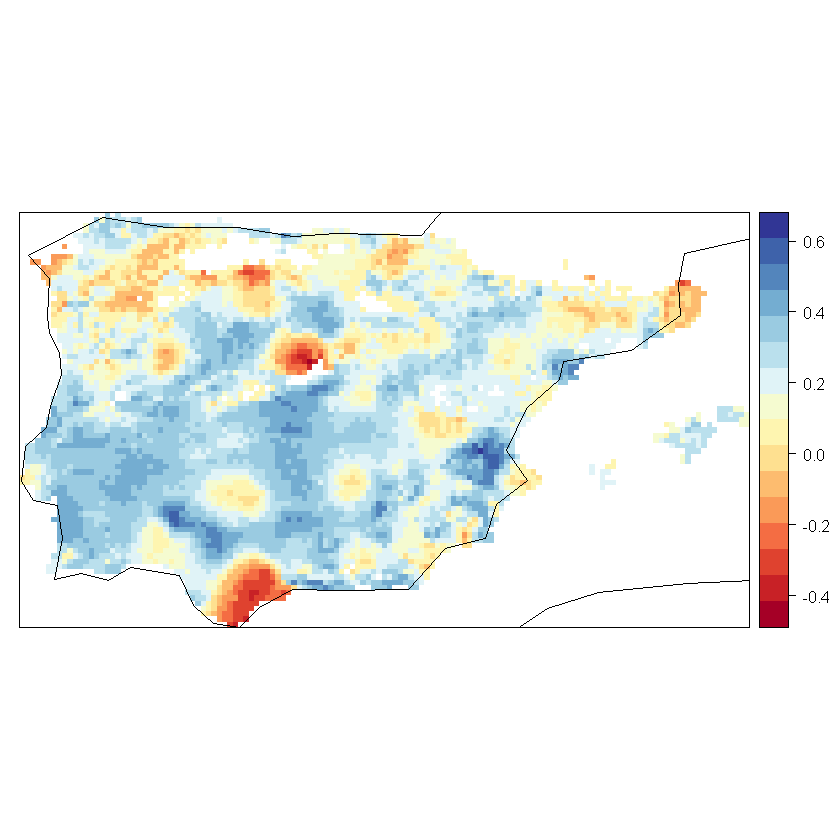

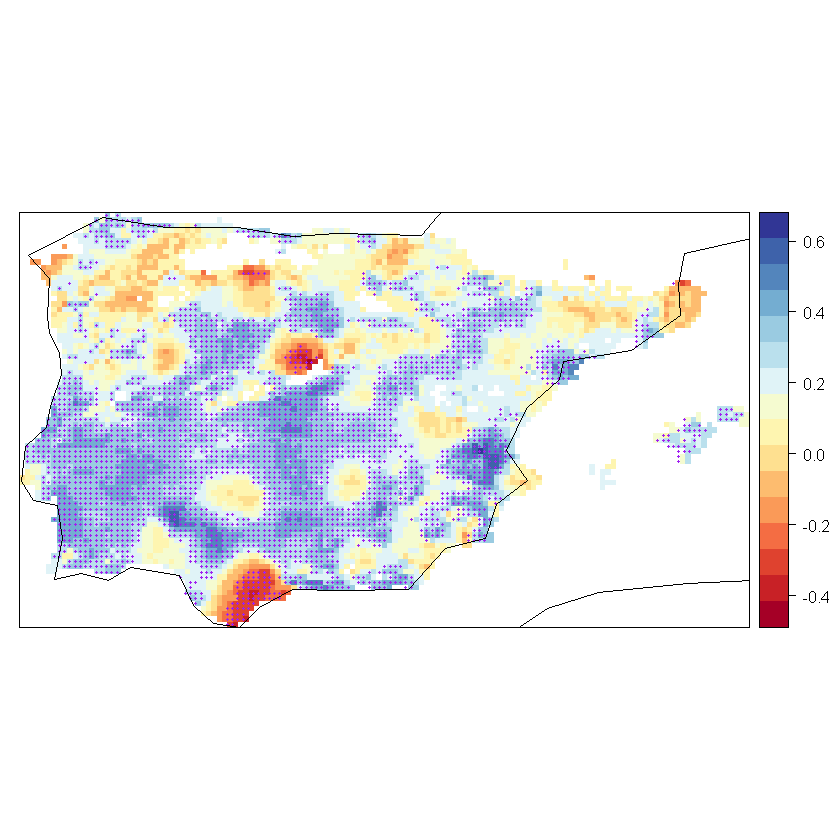

In [21]:
# An example of how to compute a trend map using climatology as a wrapper for trend:
# data("EOBS_Iberia_tas")
# dates <- getRefDates(EOBS_Iberia_tas)

tau.estimate <- climatology(spring2,
                            clim.fun = list(FUN = "trend.1D", dates = dates, method = "kendall"))
spatialPlot(tau.estimate, backdrop.theme = "coastline")
# Adding significant trend points is usually needed: 
pval.estimate <- climatology(spring2,
                            clim.fun = list(FUN = "trend.1D",
                                            dates = dates,
                                            method = "kendall",
                                            return.pvalue = TRUE))
sig.points <- visualizeR::map.stippling(clim = pval.estimate, threshold = 0.05, condition = "LT", 
                                        pch = 19, cex = .25, col = "purple")
spatialPlot(tau.estimate, backdrop.theme = "coastline", sp.layout = list(sig.points))

## Summer

In [6]:
summer <- bindGridEstaciones(CE_num, estacion = "Summer")

In [7]:
dates <- getRefDates(summer)

In [8]:
# An example of how to compute a trend map using climatology as a wrapper for trend:
# data("EOBS_Iberia_tas")
# dates <- getRefDates(EOBS_Iberia_tas)

tau.estimate <- climatology(summer,
                            clim.fun = list(FUN = "trend.1D", dates = dates, method = "kendall"))
spatialPlot(tau.estimate, backdrop.theme = "coastline")
# Adding significant trend points is usually needed: 
pval.estimate <- climatology(summer,
                            clim.fun = list(FUN = "trend.1D",
                                            dates = dates,
                                            method = "kendall",
                                            return.pvalue = TRUE))
sig.points <- visualizeR::map.stippling(clim = pval.estimate, threshold = 0.05, condition = "LT", 
                                        pch = 19, cex = .25, col = "purple")
spatialPlot(tau.estimate, backdrop.theme = "coastline", sp.layout = list(sig.points))

[2024-03-04 13:07:12] - Computing climatology...


: 

## Winter

In [4]:
winter <- bindGridEstaciones(CE_num, estacion = "Winter")

In [5]:
dates <- getRefDates(winter)

[2024-03-04 13:16:13] - Computing climatology...
Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):
"the standard deviation is zero"Warning message in cor(x, y, method = "kendall"):

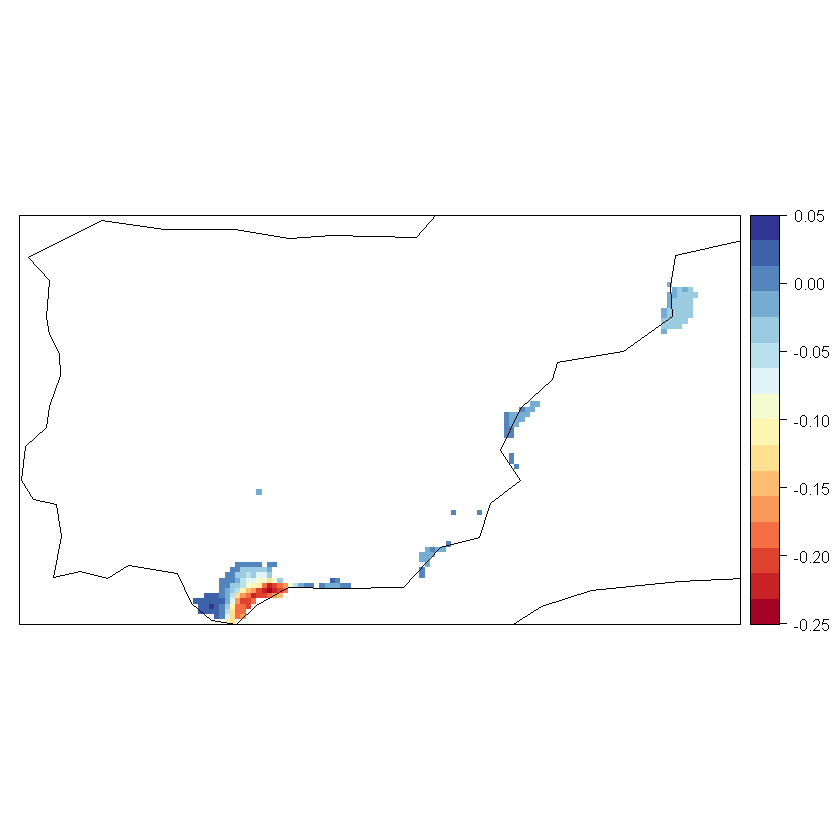

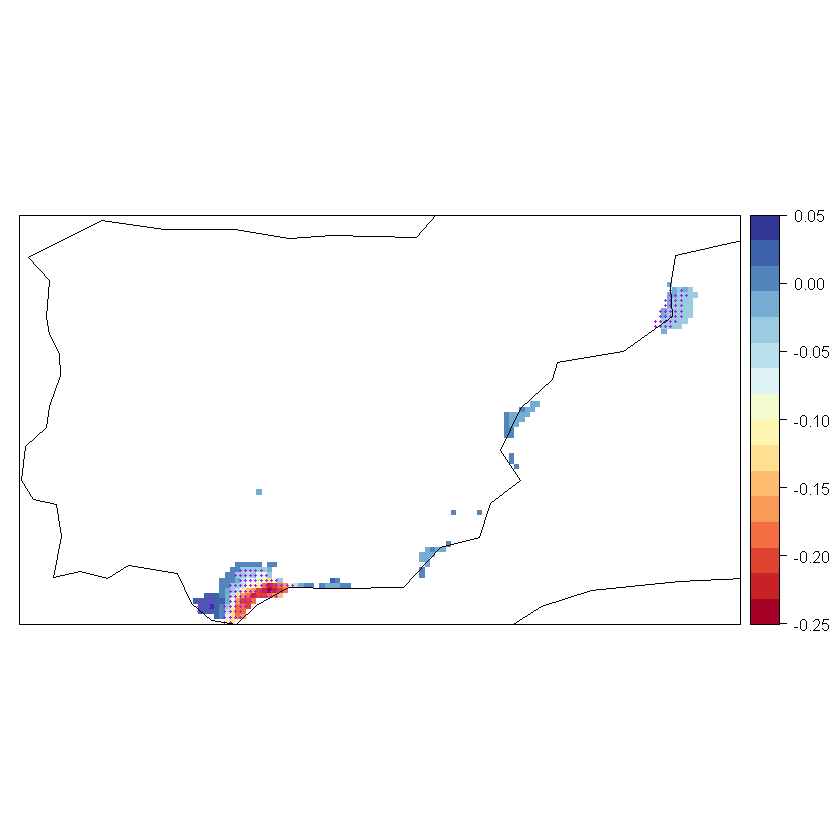

In [9]:
# An example of how to compute a trend map using climatology as a wrapper for trend:
# data("EOBS_Iberia_tas")
# dates <- getRefDates(EOBS_Iberia_tas)

tau.estimate <- climatology(winter,
                            clim.fun = list(FUN = "trend.1D", dates = dates, method = "kendall"))
spatialPlot(tau.estimate, backdrop.theme = "coastline")
# Adding significant trend points is usually needed: 
pval.estimate <- climatology(winter,
                            clim.fun = list(FUN = "trend.1D",
                                            dates = dates,
                                            method = "kendall",
                                            return.pvalue = TRUE))
sig.points <- visualizeR::map.stippling(clim = pval.estimate, threshold = 0.05, condition = "LT", 
                                        pch = 19, cex = .25, col = "purple")
spatialPlot(tau.estimate, backdrop.theme = "coastline", sp.layout = list(sig.points))

## Autumn

In [ ]:
autumn <- bindGridEstaciones(CE_num, estacion = "Autumn")

In [ ]:
dates <- getRefDates(autumn)

In [ ]:
# An example of how to compute a trend map using climatology as a wrapper for trend:
# data("EOBS_Iberia_tas")
# dates <- getRefDates(EOBS_Iberia_tas)

tau.estimate <- climatology(winter,
                            clim.fun = list(FUN = "trend.1D", dates = dates, method = "kendall"))
spatialPlot(tau.estimate, backdrop.theme = "coastline", main = "Autumn")
# Adding significant trend points is usually needed: 
pval.estimate <- climatology(winter,
                            clim.fun = list(FUN = "trend.1D",
                                            dates = dates,
                                            method = "kendall",
                                            return.pvalue = TRUE))
sig.points <- visualizeR::map.stippling(clim = pval.estimate, threshold = 0.05, condition = "LT", 
                                        pch = 19, cex = .25, col = "purple")
spatialPlot(tau.estimate, backdrop.theme = "coastline", sp.layout = list(sig.points), main = "Autumn")

# Tendencias (Percentil Ref 10_h)

### Winter

In [19]:
winter <- bindGridEstaciones(sum10, estacion = "Winter")

[2024-03-14 12:30:19] - Computing climatology...
Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"

Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = me

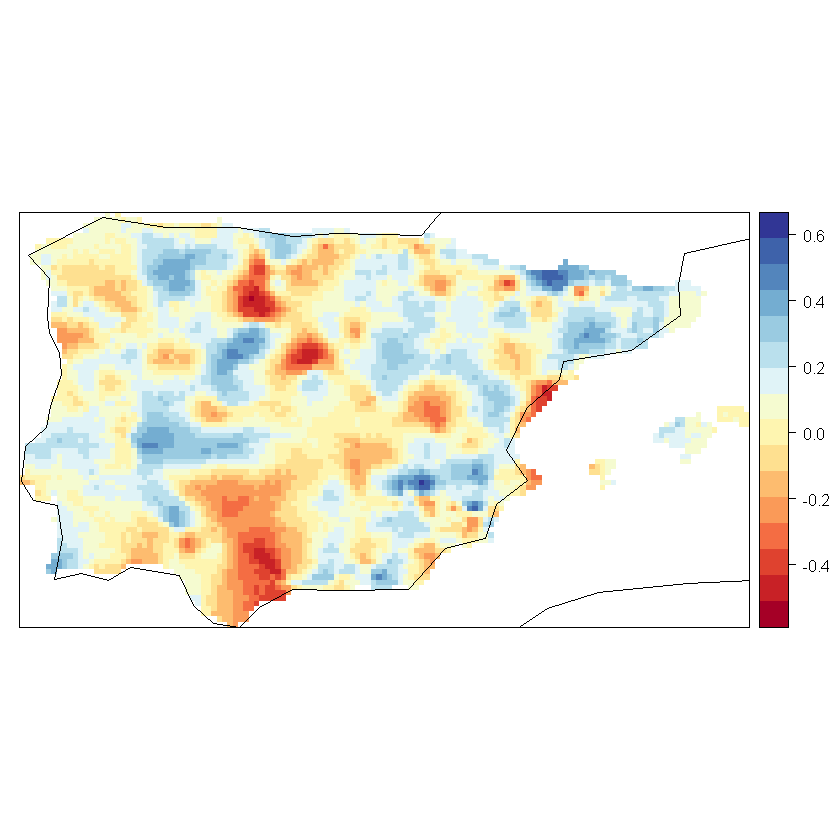

In [28]:
dates <- getRefDates(winter)
tau.estimate_winter <- climatology(winter,
                            clim.fun = list(FUN = "trend.1D", dates = dates, method = "kendall"))
spatialPlot(tau.estimate_winter, backdrop.theme = "coastline")

### Spring

In [22]:
spring <- bindGridEstaciones(sum10, estacion = "Spring")

[2024-03-14 12:24:45] - Computing climatology...
Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning messa

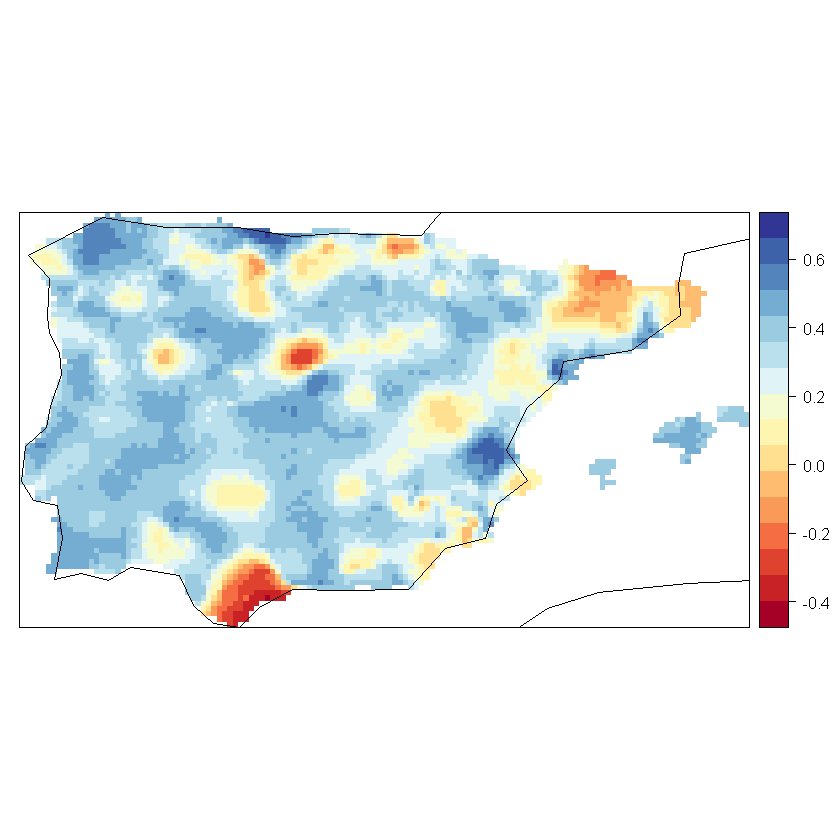

In [25]:
dates <- getRefDates(spring)
tau.estimate_spring <- climatology(spring,
                            clim.fun = list(FUN = "trend.1D", dates = dates, method = "kendall"))
spatialPlot(tau.estimate_spring, backdrop.theme = "coastline")

### Summer

In [23]:
summer <- bindGridEstaciones(sum10, estacion = "Summer")

[2024-03-14 12:27:34] - Computing climatology...
Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning messa

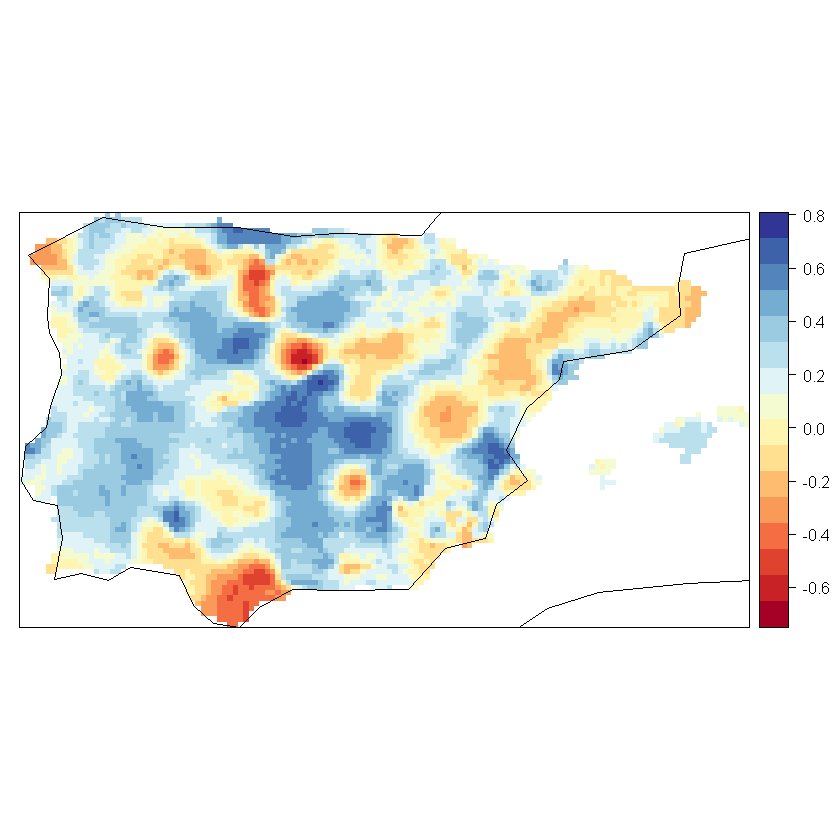

In [26]:
dates <- getRefDates(summer)
tau.estimate_summer <- climatology(summer,
                            clim.fun = list(FUN = "trend.1D", dates = dates, method = "kendall"))
spatialPlot(tau.estimate_summer, backdrop.theme = "coastline")

### Autumn

In [24]:
autumn <- bindGridEstaciones(sum10, estacion = "Autumn")

[2024-03-14 12:29:32] - Computing climatology...
Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning messa

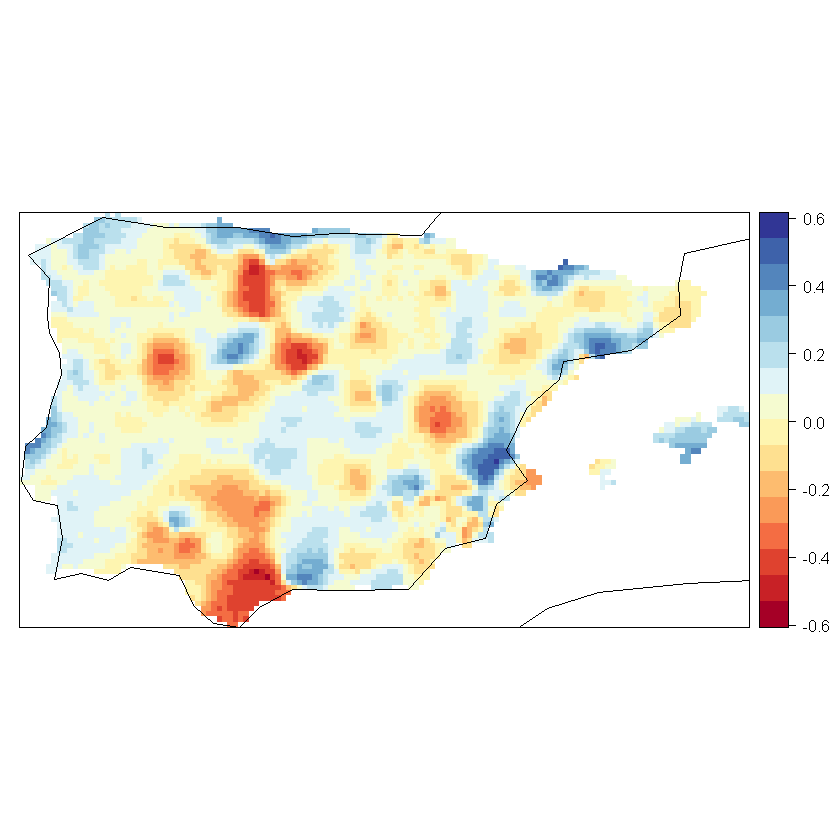

In [27]:
dates <- getRefDates(autumn)
tau.estimate_autumn <- climatology(autumn,
                            clim.fun = list(FUN = "trend.1D", dates = dates, method = "kendall"))
spatialPlot(tau.estimate_autumn, backdrop.theme = "coastline")

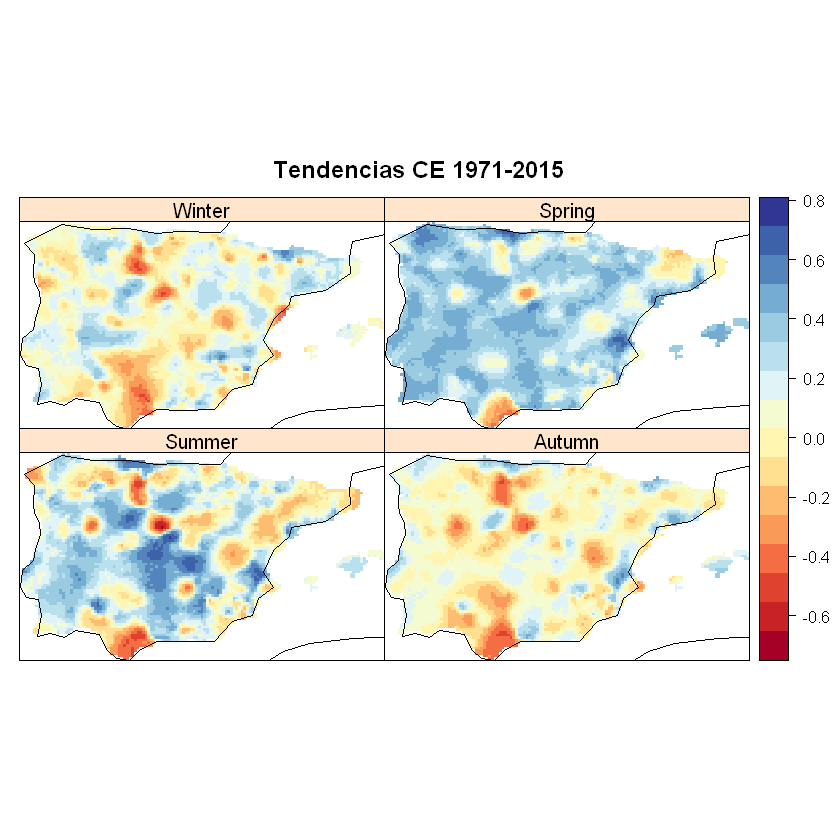

In [39]:
tau.estimate <- bindGrid(tau.estimate_winter, tau.estimate_spring, tau.estimate_summer, tau.estimate_autumn, dimension = "member", skip.temporal.check = TRUE)
spatialPlot(tau.estimate, backdrop.theme = "coastline",  names.attr = c("Winter", "Spring", "Summer", "Autumn"), main = "Tendencias CE 1971-2015", as.table = TRUE)